# 1.2 Método *regula falsi*

[![Open In Colab](./imagenes/colab-badge.png)](https://colab.research.google.com/github/caramirezs/MetNum_librodigital/blob/master/1_Ecuaciones_de_una_variable/1.2_Metodo_regula_falsi.ipynb)

In [5]:
# EJECUTAR ESTA CELDA
# Librerias y Funciones iniciales
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def graficar(f, x_i, x_f, num=1000):
    """
    Gráfica de funciones algebraicas
    :param f: función, previamente definida
    :param x_i: límite inferior del intervalo
    :param x_f: límite superior del intervalo
    :param num: división del intervalo
    :return: figura y objeto de ejes para la gráfica de la función
    """
    sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
    # Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
    x = np.linspace(x_i, x_f, num)
    # Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
    # figsize se utiliza para establecer el tamaño de la figura.
    fig, ax = plt.subplots(figsize=(20,8))
    # Grafica la función f(x) en el objeto de ejes creado anteriormente.
    ax.plot(x, f(x))
    # Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
    xmin, xmax = ax.get_xlim()
    ymin, ymax = ax.get_ylim()
    # label size de los ejes
    ax.tick_params(labelsize=20, axis='x')
    ax.tick_params(labelsize=20, axis='y')
    # Agrega flechas a los ejes x e y para indicar su dirección.
    ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10))
    # Devuelve la figura y el objeto de ejes para que puedan ser manipulados y mostrados según se desee.
    return fig, ax

def met_regula_falsi(f, a, b, tol=1e-4, n=50, verbose=True):
    """
    Método de la falsa posición para encontrar la solución de la ecuación f(x) = 0.

    :param f: Función previamente definida a la que se le intenta encontrar una solución.
    :param a: Límite inferior del intervalo.
    :param b: Límite superior del intervalo.
    :param tol: Tolerancia para el criterio de parada (por defecto, 1e-4).
    :param n: Número máximo de iteraciones para el criterio de parada (por defecto, 50).
    :param verbose: Si se debe imprimir información de la iteración en cada paso (por defecto, True).

    :return: Solución exacta o aproximada, si existe.
    """

    # Comprobar si el intervalo es válido para el método de bisección
    if not f(a) * f(b) < 0:
        print(f'El intervalo no funciona: f({a})={f(a):.2f}, f({b})={f(b):.2f}')
        return None

    # Inicializar variables
    i = 1
    p_0 = a

    # Realizar iteraciones
    while i <= n:

        # Calcular punto de corte de la recta con el eje
        p_i = a - (f(a) * (b - a)) / (f(b) - f(a))  # falsa posición
        e_abs = abs(p_0 - p_i)

        # Imprimir información
        if verbose:
            print(f'ite {i:<2}: a_{i - 1:<2} = {a:.4f}, b_{i - 1:<2} = {b:.4f}, p_{i:<2} = {p_i:.5f}'
                f' | e_abs: {e_abs:e}')

        # Si encontramos la solución exacta, retornarla
        if f(p_i) == 0:
            print(f'>>> Solución exacta encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Actualizar intervalo
        if f(a) * f(p_i) < 0:
            b = p_i
        else:
            a = p_i

        # Actualizar variables y lista de errores
        p_0 = p_i

        # Si la tolerancia se ha alcanzado, retornar solución
        if e_abs < tol:
            print(f'>>> Solución encontrada después de {i} iteraciones: x->{p_i:.15f}')
            return p_i

        # Incrementar contador
        i += 1

    print('solución no encontrada, iteraciones agotadas')
    return None

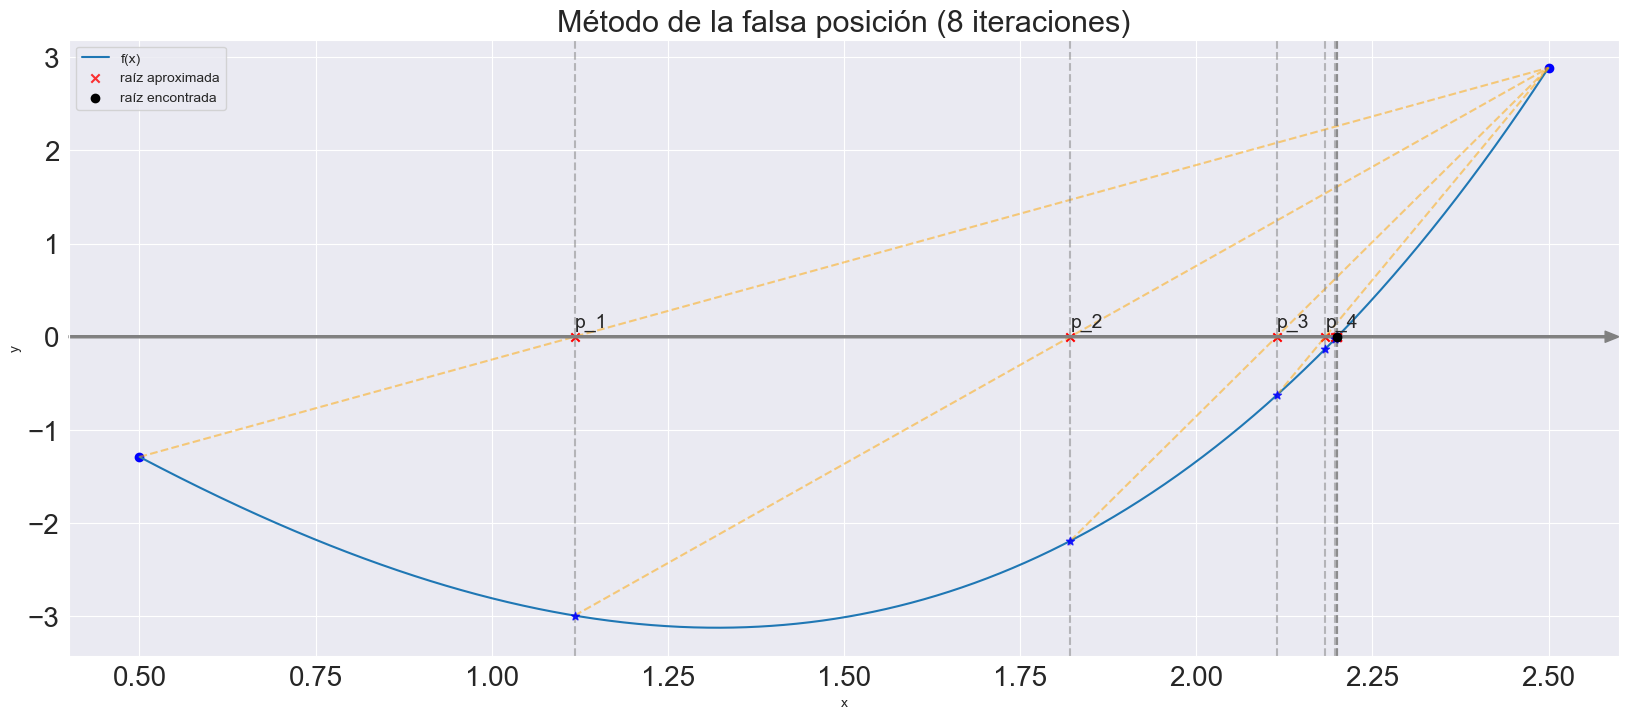

La secuencia para encontrar la solución fue: [1.1175, 1.8211, 2.114, 2.183, 2.1968, 2.1994, 2.1999, 2.2]


In [18]:
# EJECUTAR ESTA CELDA
# Definir la función
f = lambda x: np.e**x - 3*np.sin(x) - 3*x

# Definir el intervalo, tolerancia y No. máximo de iteraciones
a, b = 0.5, 2.5
tolerancia = 1e-4
max_ite = 100

# Crea un arreglo de valores x equiespaciados entre x_i y x_f con una longitud de num.
x = np.linspace(a, b, 1000)
# Inicializar la lista de aproximaciones
lista_sol = list()


sns.set_style('darkgrid') # Agrega el estilo "dark" de Seaborn
# Crea una figura y un objeto de ejes (axis) utilizando matplotlib.
# figsize se utiliza para establecer el tamaño de la figura.
fig, ax = plt.subplots(figsize=(20, 8))
# Graficar la función
ax.plot(x, f(x), label='f(x)')
ax.scatter(a, f(a), color='blue')
ax.scatter(b, f(b), color='blue')

# Iterar hasta que la tolerancia sea alcanzada o se supere el número máximo de iteraciones
ite, p_0 = 1, a
while ite <= max_ite:
    p_i = a - (f(a) * (b - a)) / (f(b) - f(a))  # falsa posición
    # Agregar c a la lista de aproximaciones
    lista_sol.append(round(p_i,4))

    # Graficar la línea vertical en p_i y el punto en la grafica
    ax.axvline(x=p_i, linestyle='--', color='gray', alpha=0.5, zorder=2)
    ax.scatter(p_i, f(p_i), color='blue', alpha=0.8, marker='*', zorder=3)
    ax.scatter(p_i, 0, color='red', alpha=1, marker='x', zorder=2)
    # texto
    if ite <= 4:
        plt.text(p_i, 0.1, f"p_{ite}", fontsize=14)
        plt.plot([a, b], [f(a), f(b)], '--', color='orange', alpha=0.5, zorder=2)
    # Actualizar el intervalo
    if f(p_i) == 0:
        break
    elif f(a)*f(p_i) < 0:
        b = p_i
    else:
        a = p_i

    if abs(p_i-p_0) < tolerancia:
        break
    p_0 = p_i
    ite += 1

# Graficar el punto final encontrado
ax.scatter(p_i, 0, color='red', alpha=0.8, marker='x', label='raíz aproximada')
ax.scatter(p_i, f(p_i), color='black', label='raíz encontrada', zorder=3)

### EJES ###
# Obtiene los límites inferior y superior de x y y de los ejes del objeto de ejes.
xmin, xmax = ax.get_xlim()
ymin, ymax = ax.get_ylim()
# label size de los ejes
ax.tick_params(labelsize=20, axis='x')
ax.tick_params(labelsize=20, axis='y')
# Agrega flechas a los ejes x e y para indicar su dirección.
ax.annotate("", xy=(xmax, 0), xytext=(xmin, 0), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)
ax.annotate("", xy=(0, ymax), xytext=(0, ymin), arrowprops=dict(color='gray', width=1.5, headwidth=8, headlength=10), zorder=2)

# Configurar la gráfica
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title(f'Método de la falsa posición ({ite} iteraciones)', fontsize=22)
plt.show()
print(f'La secuencia para encontrar la solución fue: {lista_sol}')

El **método de posición falsa** (también llamado *Regula Falsi*) genera aproximaciones
de la misma manera que el método de la secante, pero incluye una prueba para garantizar que
la raíz siempre se agrupa entre iteraciones sucesivas. A pesar de que no es un método que por
lo general recomendamos, ilustra cómo se puede integrar la agrupación.

Este método es un intento por aumentar la rapidez del método de bisección. Los algoritmos solo se
diferencian en el punto del intervalo que calculan. Mientras en bisección es el punto medio, en regula
falsi es el corte con el eje x de la recta que une los puntos extremos de la gráfica definida en el intervalo
$[a_n, b_n]$.

Si $a_n$ y $b_n$ son los extremos del intervalo, entonces la ecuación de la recta que contiene los puntos
$(a_n, f(a_n))$ y $(b_n, f(n))$ es $y=\frac{f(b_n) - f(a_n)}{b_n-a_n}(x-a_n)+f(a_n)$,y su corte con el eje $x, a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}$, define el punto $c_n$, que se espera sea una mejor aproximación.

**Observación:** las condiciones necesarias para asegurar la convergencia del método de regula falsi
corresponden a las condiciones del método de bisección. Aunque no es posible aplicar la formula del
método de bisección para calcular la cantidad de iteraciones necesarias en su ejecución, se espera lograr
la precisión establecida en un menor número de iteraciones.

### Sobre el método de **Regula Falsi** (*método de posición falsa*)

El método sirve para encontrar un valor aproximado de $x$  de modo que $f(x) = 0$ y pertenece al tipo de métodos iterativos.

Si $f(x)= 0$, entonces $x=y$, fin del calculo

Dada una función $f(x)$ y sea continua en un intervalo $[a, b]$ se debe cumplir que $f(a)*f(b) < 0$, garantiza la convergencia

**Parametros**

* $f(x) =$ función de $x$
* $[a, b] =$ Intervalos
* $TOL$ = Tolerancia
* $n-máx$ = Número máximo de iteraciones

### El **método** explicado paso a paso:

**Paso 1:** Evaluar $f(a)$ y $f(b)$

**Paso 2:** Obtener $p_i$:

$p_i = a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}$

**Paso 3:** Obtener $f(p_i)$:

**Paso 4:** Determinar el intervalo


**Paso 5:** Calcular el error:

$eabs= |p_i-p_{i-1}|$

$eabs < TOL \to$ ***STOP***



**Gráficamente de puede interpretar el método de Regular Falsi**

<img src="imagenes/mregularfalsi.png"/>

*Imagen del libro de Burden - Análisis numérico 10ed (2017)*

**************************************



### Ejemplo práctico 1


Resolver la ecuación $e^x - sin(x) = 3x = 0 $

1. Graficar la ecuación en un intervalo a elección, para este caso el intervalo es $[0, 0.5]$:

**Datos**

$f(x) = e^x - sin(x) = 3x $

$(a, b) = (0, 0.5)$

$a = 0$

$b = 0.5$

Aproximación = $10^{-4}$

**Procedimiento:**

*Paso 1:* Se recomienda graficar antes de empezar el calculo

*Paso 2:* Evaluar $f(a)$ y $f(b)$

*Paso 3:* Obtener $p_i$

\begin{equation}
p_i = a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}
\end{equation}

*Paso 4:* Obtener $f(p_i)$

*Paso 5:* Determinar el nuevo intervalo

*Paso 6:* Calcular el error  $eabs = |p_i-p_{i-1}|$

*Nota:* El procedimiento de los *Pasos del 2 al 6* se realizan ejecutando el *met_regula_falsi()*

(<Figure size 2000x800 with 1 Axes>, <AxesSubplot:>)

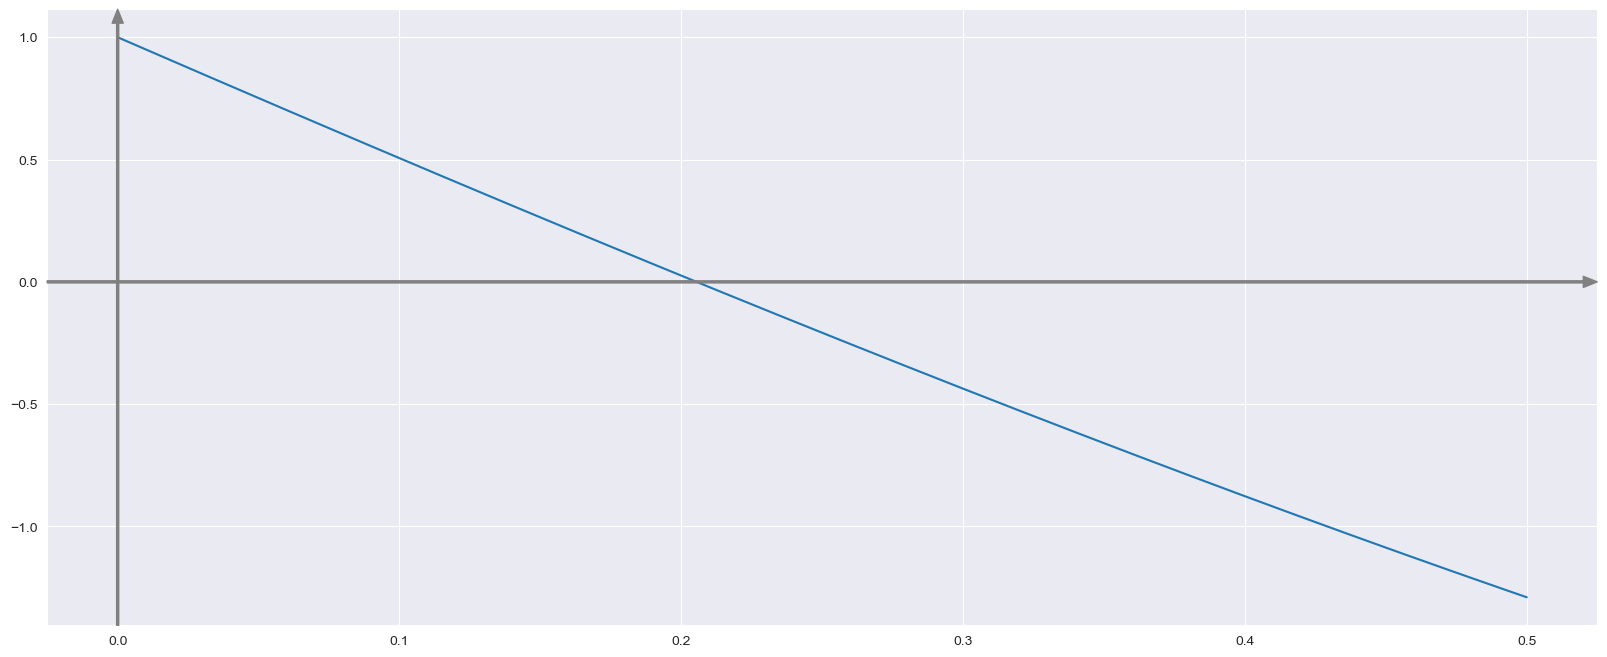

In [4]:
# Función expresada en python
f = lambda x: np.e**x - 3*np.sin(x) - 3*x
graficar(f, 0, 0.5)

In [4]:
met_regula_falsi(f, 0, 0.5, tol=1e-4)

ite 1 : a_0  = 0.0000, b_0  = 0.5000, p_1  = 0.21838 | e_abs: 2.183830e-01
ite 2 : a_1  = 0.0000, b_1  = 0.2184, p_2  = 0.20582 | e_abs: 1.256315e-02
ite 3 : a_2  = 0.0000, b_2  = 0.2058, p_3  = 0.20540 | e_abs: 4.184166e-04
ite 4 : a_3  = 0.0000, b_3  = 0.2054, p_4  = 0.20539 | e_abs: 1.374833e-05
>>> Solución encontrada después de 4 iteraciones: x->0.205387697357079


0.205387697357079

### Ejemplo práctico 2


Resolver la ecuación $x^{10} -1 = 0$

1. Graficar la ecuación en un intervalo a elección, para este caso el intervalo es $[0, 1.2]$:

**Datos**

$f(x) = x^{10} -1$

$(a, b) = (0, 1.2)$

$a = 0$

$b = 1.2$

Aproximación = $10^{-15}$

**Procedimiento:**

*Paso 1:* Se recomiennda graficar antes de empezar el calculo

*Paso 2:* Evaluar $f(a)$ y $f(b)$

*Paso 3:* Obtener $p_i$

\begin{equation}
p_i = a_n-\frac{f(a_n)(b_n - a_n)}{f(b_n)-f(a_n)}
\end{equation}

*Paso 4:* Obtener $f(p_i)$

*Paso 5:* Determunar el nuevo intervalo

*Paso 6:* Calcular el error  $eabs = |p_i-p_{i-1}|$

*Nota:* El procedimiento de los *Pasos del 2 al 6* se realizan ejecutando el *met_regula_falsi()*

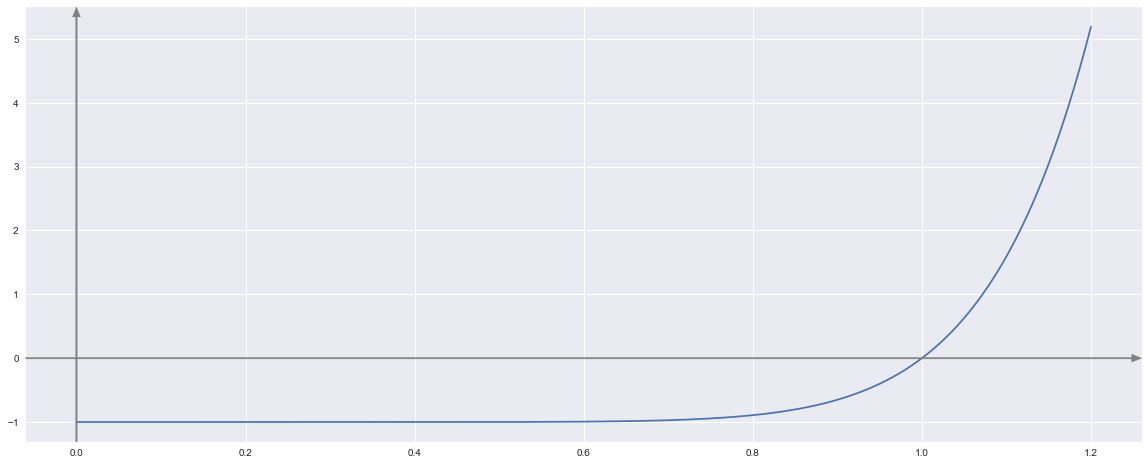

In [5]:
f = lambda x: x**10 - 1
graficar(f, 0, 1.2)

In [6]:
met_regula_falsi(f, 0, 1.2, tol=1e-15, n=500)

ite 1 : a_0  = 0.0000, b_0  = 1.2000, p_1  = 0.19381 | e_abs: 1.938067e-01
ite 2 : a_1  = 0.1938, b_1  = 1.2000, p_2  = 0.35631 | e_abs: 1.625058e-01
ite 3 : a_2  = 0.3563, b_2  = 1.2000, p_3  = 0.49257 | e_abs: 1.362565e-01
ite 4 : a_3  = 0.4926, b_3  = 1.2000, p_4  = 0.60674 | e_abs: 1.141735e-01
ite 5 : a_4  = 0.6067, b_4  = 1.2000, p_5  = 0.70201 | e_abs: 9.527059e-02
ite 6 : a_5  = 0.7020, b_5  = 1.2000, p_6  = 0.78047 | e_abs: 7.845796e-02
ite 7 : a_6  = 0.7805, b_6  = 1.2000, p_7  = 0.84340 | e_abs: 6.292635e-02
ite 8 : a_7  = 0.8434, b_7  = 1.2000, p_8  = 0.89193 | e_abs: 4.853266e-02
ite 9 : a_8  = 0.8919, b_8  = 1.2000, p_9  = 0.92767 | e_abs: 3.574009e-02
ite 10: a_9  = 0.9277, b_9  = 1.2000, p_10 = 0.95281 | e_abs: 2.513959e-02
ite 11: a_10 = 0.9528, b_10 = 1.2000, p_11 = 0.96981 | e_abs: 1.699576e-02
ite 12: a_11 = 0.9698, b_11 = 1.2000, p_12 = 0.98095 | e_abs: 1.114112e-02
ite 13: a_12 = 0.9809, b_12 = 1.2000, p_13 = 0.98809 | e_abs: 7.142969e-03
ite 14: a_13 = 0.9881, b_

0.9999999999999984